In [ ]:
!pip install yfinance --upgrade --no-cache-dir


In [ ]:
!pip install python-bcb

In [ ]:
#Análise de Dados econômicos usando diferentes bases de dados#

#Importando as bibliotecas necessárias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
today = date.today()

import pandas_datareader.data as web
import yfinance as yf
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.\n
#1.1.2 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
import bcb 
from bcb import sgs

In [ ]:
#Base de dados do banco do Brasil usando API

def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    

In [ ]:
#Importando dados usando a biblioteca BCB
sgs.get(('IPCA', 433), last=36)

In [ ]:
#Percorrendo a base de dados do Yahoo
yf.pdr_override()
# E com o comando web.get_data_yahoo podemos ter os dados históricos da bovespa

# ÍNDICES BRASILEIROS
ibov = web.get_data_yahoo('^BVSP', start='2000-11-03')
ifix = web.get_data_yahoo('IFIX.SA', start='2000-01-01')

# RENDA FIXA BR & INDICES DE INFLAÇÃO BR
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
cdi = consulta_bc(12)

#ÍNDICES AMERICANOS
sp500 = web.get_data_yahoo('^GSPC', start='2000-01-01')

#COMMODITIES
crudeoil = web.get_data_yahoo('CL=F', start='2000-01-01')
gold = web.get_data_yahoo('GC=F', start='2000-01-01')

#CRIPTOMOEDAS
btcusd = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2019,1,1), end=today)



In [31]:
print(btcusd)

                    Open          High           Low         Close  \
Date                                                                 
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
...                  ...           ...           ...           ...   
2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938   
2022-12-31  16603.673828  16628.986328  16517.519531  16547.496094   
2023-01-01  16547.914062  16630.439453  16521.234375  16625.080078   
2023-01-02  16625.509766  16759.343750  16572.228516  16688.470703   
2023-01-03  16688.847656  16760.447266  16622.371094  16679.857422   

               Adj Close       Volume  
Date                                   
2019-01-0

In [ ]:
ibov['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('IBOV')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [ ]:
sp500['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('SP500')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

Text(0, 0.5, 'Valor do índice')

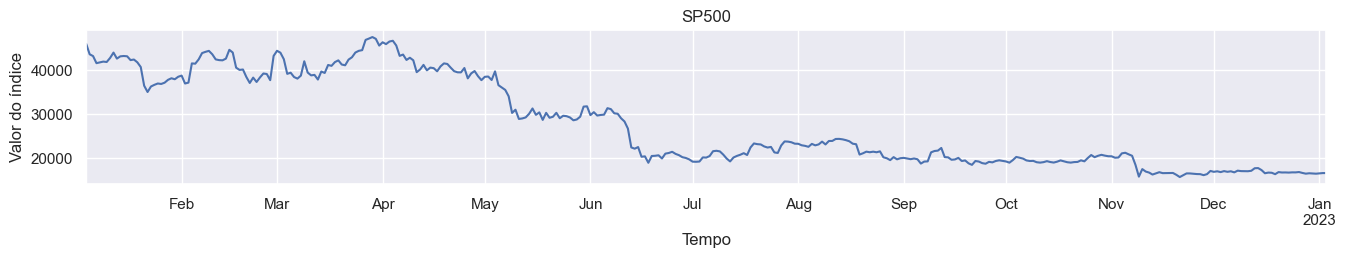

In [32]:
btcusd['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('btc-usd')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')